# Final Project: AITA
## **Group Member:**
Chih-En Ko (ck29388) Tue. Thur. 1-3

Cheng-Ya Liou (cl49358) Tue. Thur. 1-3

Jui-Jia Lin (jl82983) Tue. Thur. 1-3

Fangshu Song (fs9589) Tue. Thur. 1-3

Jiarui Chang (jc95267) Tue. Thur. 1-3

## Scraping the data from https://www.reddit.com/r/AITAFiltered/

In [11]:
import praw
import re
import pandas as pd

reddit = praw.Reddit(
    client_id="XXXXXX",
    client_secret="YYYYYY",
    password="ZZZZZZ",
    user_agent="testscript by u/AAAAAA",  
    username="BBBBBB"
)

posts=[]

subreddit = reddit.subreddit("AITAFiltered")  

for submission in subreddit.controversial(limit=None): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_controversial.csv', index=False,encoding='utf_8_sig')

posts=[]

for submission in subreddit.hot(limit=None): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_hot.csv', index=False,encoding='utf_8_sig')


posts=[]

for submission in subreddit.new(limit=None): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_new.csv', index=False,encoding='utf_8_sig')



posts=[]

for submission in subreddit.rising(limit=None): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_rising.csv', index=False,encoding='utf_8_sig')


posts=[]

for submission in subreddit.top(limit=None,time_filter="all"): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_topall.csv', index=False,encoding='utf_8_sig')


posts=[]

for submission in subreddit.top(limit=None,time_filter="year"): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_topyear.csv', index=False,encoding='utf_8_sig')


posts=[]

for submission in subreddit.top(limit=None,time_filter="month"): 
     sub = "https://www.reddit.com" + submission.url
     ori_post = reddit.submission(url=sub)
     result = ""
     for top_level_comment in submission.comments:
        pattern = r"\*\*(.*?)\*\*"  
        matches = re.findall(pattern, top_level_comment.body)  
        if (len(matches) > 0):
            result = matches[0]
     posts.append([submission.title, ori_post.selftext, result])

posts = pd.DataFrame(posts,columns=['title', 'content','result'])
posts.to_csv('reddit_data_topmonth.csv', index=False,encoding='utf_8_sig')



## Cleaning the data

In [21]:
# clean the data
df = pd.read_csv("reddit_data_total.csv")
df = df.dropna()
df = df[df['content'] != '[removed]']
df = df[df['content'] != '[deleted]']
df = df.drop_duplicates()
df.to_csv('reddit_final_v2.csv',index=False,encoding='utf_8_sig')

## Word Freq, Word Cloud and Lift

In [5]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import pandas as pd
nltk.download()

aita_data = pd.read_csv('reddit_final_v2.csv')
aita_data = pd.DataFrame(aita_data)


# Combine all the reviews into a single list of words, each review contributing unique words only
all_unique_words = []
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to first character used by WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

for review in aita_data['title']:
    # Correct contractions and remove special characters and numbers
    review = review.replace("n't", " not").replace("'m", " am").replace("'s", " is").replace("'ve", " have").replace("'ll", " will").replace("'d", " would")
    cleaned_content = re.sub('[^a-zA-Z\s]', '', review)
    
    # Convert all words to lower case and tokenize them
    words = word_tokenize(cleaned_content.lower())
    
    # Get NLTK stop words
    stop_words_nltk = set(stopwords.words('english'))
    
    # Define custom stop words
    custom_stop_words = set(['something', 'things', 'edit', 'way', 'anything', 'aita', 'lot', 'get', 'thing', 'year', 'im', 'didnt', 'telling','wibta','wanting','refusing','asking'])

    # Combine custom and NLTK stop words
    final_stop_words = stop_words_nltk.union(custom_stop_words)
    
    # Filter out stop words
    filtered_words = [word for word in words if word not in final_stop_words]
    
    # Add the filtered unique words from this review to the main list
    all_unique_words.extend(filtered_words)
    
    # POS tagging
    tagged_words = pos_tag(filtered_words)
        
    # Lemmatize using POS tag
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_words]
    
    # Filter out only the nouns
    nouns = [word for word, pos in tagged_words if pos in ["NN", "NNS", "NNP", "NNPS"] and not word.endswith('ing')]
    
    # Add the filtered unique nouns from this review to the main list
    all_unique_words.extend(set(nouns))  # Using set to keep nouns unique for each review

# Calculate the frequency of each noun
noun_freq = Counter(all_unique_words)

# Display the most common nouns
common_nouns = noun_freq.most_common(20)
common_nouns


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[('wife', 451),
 ('daughter', 409),
 ('sister', 379),
 ('husband', 360),
 ('son', 335),
 ('friend', 271),
 ('girlfriend', 200),
 ('mom', 197),
 ('family', 195),
 ('kids', 193),
 ('wedding', 190),
 ('brother', 186),
 ('parents', 151),
 ('house', 151),
 ('boyfriend', 144),
 ('pay', 130),
 ('baby', 126),
 ('friends', 118),
 ('child', 118),
 ('birthday', 114)]

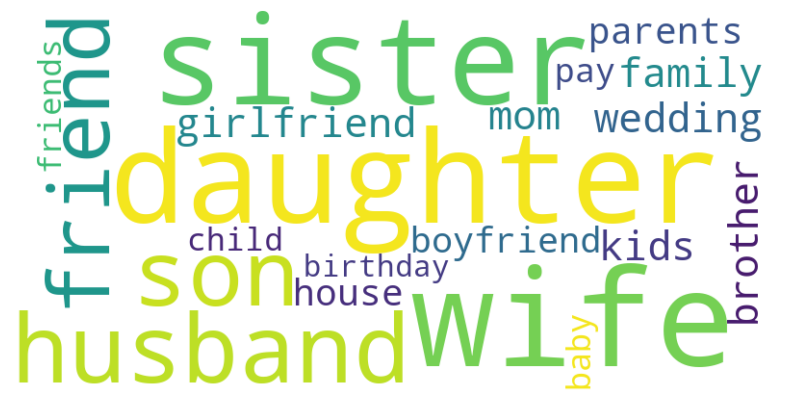

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq = dict(common_nouns)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Add a new column where the result is concatenated to the title
aita_data['title_with_result'] = aita_data['title'] + " " + aita_data['result']

# Count total NTA and YTA posts
total_NTA = len(aita_data[aita_data['result'] == 'Not the A-hole'])
total_YTA = len(aita_data[aita_data['result'] == 'Asshole'])
total_posts = total_NTA + total_YTA  

lift_values = {}

for word, _ in common_nouns:
    # Count how many times the word appears in NTA and YTA posts in the title_with_result column
    count_word_NTA = len(aita_data[(aita_data['title_with_result'].str.contains(word)) & (aita_data['result'] == 'Not the A-hole')])
    count_word_YTA = len(aita_data[(aita_data['title_with_result'].str.contains(word)) & (aita_data['result'] == 'Asshole')])

    # Calculate probabilities
    P_word = (count_word_NTA + count_word_YTA) / total_posts
    P_NTA = total_NTA / total_posts
    P_YTA = total_YTA / total_posts
    
    P_word_NTA = count_word_NTA / total_posts
    P_word_YTA = count_word_YTA / total_posts

    # Calculate lift values
    lift_NTA = P_word_NTA / (P_word * P_NTA)
    lift_YTA = P_word_YTA / (P_word * P_YTA)

    lift_values[word] = {'Lift_NTA': lift_NTA, 'Lift_YTA': lift_YTA}

df_lift = pd.DataFrame.from_dict(lift_values, orient='index')
df_lift['Lift_NTA_Percentage'] = df_lift['Lift_NTA'] / (df_lift['Lift_NTA'] + df_lift['Lift_YTA'])
df_lift['Lift_YTA_Percentage'] = df_lift['Lift_YTA'] / (df_lift['Lift_NTA'] + df_lift['Lift_YTA'])

print(df_lift)


            Lift_NTA  Lift_YTA  Lift_NTA_Percentage  Lift_YTA_Percentage
wife        0.775161  1.270812             0.378872             0.621128
daughter    0.901597  1.118524             0.446308             0.553692
sister      1.130725  0.842546             0.573021             0.426979
husband     1.136012  0.836178             0.576015             0.423985
son         0.978065  1.026420             0.487939             0.512061
friend      1.027001  0.967479             0.514922             0.485078
girlfriend  0.852928  1.177144             0.420147             0.579853
mom         1.313467  0.622438             0.678477             0.321523
family      1.171354  0.793609             0.596120             0.403880
kids        0.794710  1.247266             0.389187             0.610813
wedding     1.021222  0.974439             0.511721             0.488279
brother     1.023361  0.971863             0.512905             0.487095
parents     0.931175  1.082897             0.462335

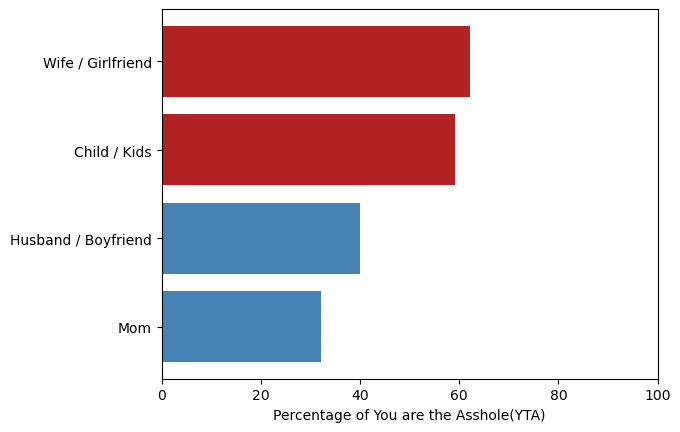

In [9]:
import matplotlib.pyplot as plt

combined_value_Husband_Boyfriend = (df_lift.loc['husband', 'Lift_YTA_Percentage'] + df_lift.loc['boyfriend', 'Lift_YTA_Percentage'])/2*100
combined_value_Child_Kids = (df_lift.loc['child', 'Lift_YTA_Percentage'] + df_lift.loc['kids', 'Lift_YTA_Percentage'])/2*100

labels = ['Mom', 'Husband / Boyfriend', 'Child / Kids', 'Wife / Girlfriend']
values = [df_lift.loc['mom', 'Lift_YTA_Percentage']*100, combined_value_Husband_Boyfriend, combined_value_Child_Kids, df_lift.loc['wife', 'Lift_YTA_Percentage']*100]

combined = list(zip(labels, values))

sorted_combined = sorted(combined, key=lambda x: x[1])

sorted_labels, sorted_values = zip(*sorted_combined)

plt.barh(sorted_labels, sorted_values, color=['SteelBlue', 'SteelBlue', 'Firebrick', 'Firebrick'])
plt.xlim(0, 100)

plt.xlabel('Percentage of You are the Asshole(YTA)')

plt.show()


## Sentiment Analysis

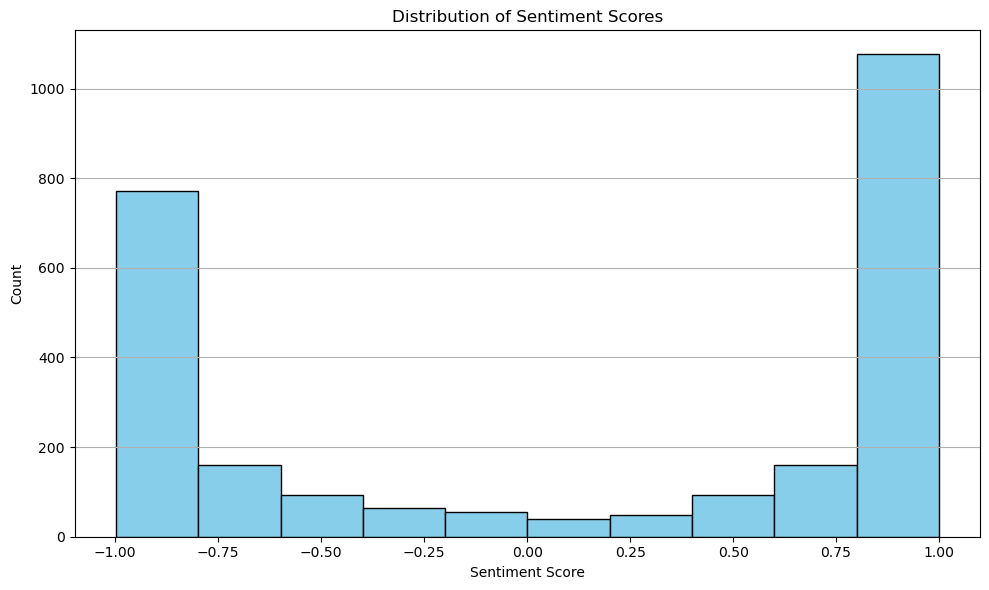

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Read in data
df = pd.read_csv('reddit_final_v2.csv')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

## sentiment_score
df['sentiment_score'] = df['content'].apply(get_sentiment_score)

## sentiment_score_range
# Example custom bins
custom_bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
# Generate labels based on bin ranges
labels = [f"{custom_bins[i]}~{custom_bins[i+1]}" for i in range(len(custom_bins)-1)]
# Create the sentiment_score_range column with custom labels
df['sentiment_score_range'] = pd.cut(df['sentiment_score'], bins=custom_bins, labels=labels)

## sentiment
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=10, color='skyblue', edgecolor = 'black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

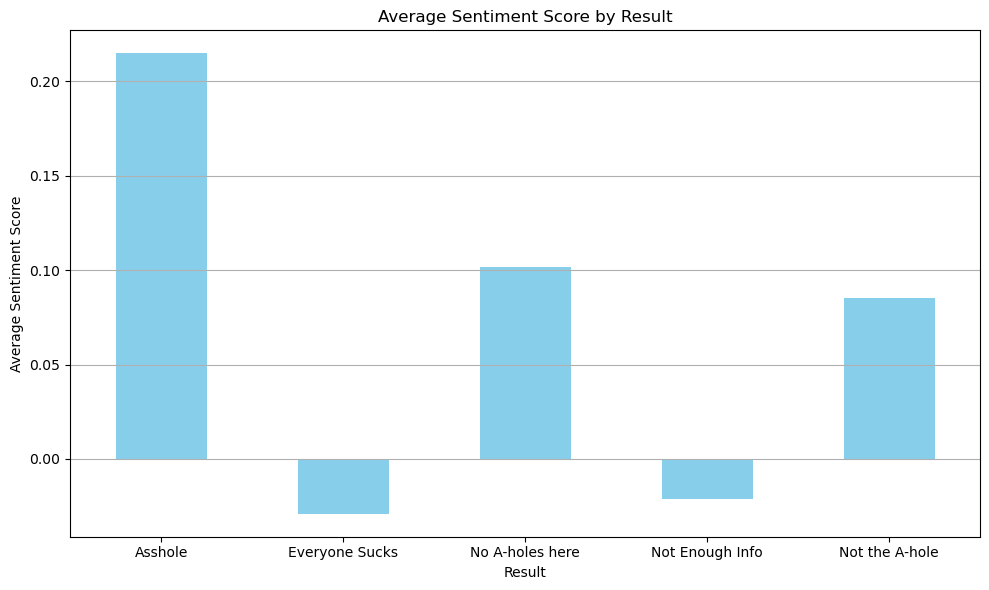

In [11]:
df1 = df.groupby(['result'])['sentiment_score'].mean()

plt.figure(figsize=(10, 6))
df1.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Result')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Result')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

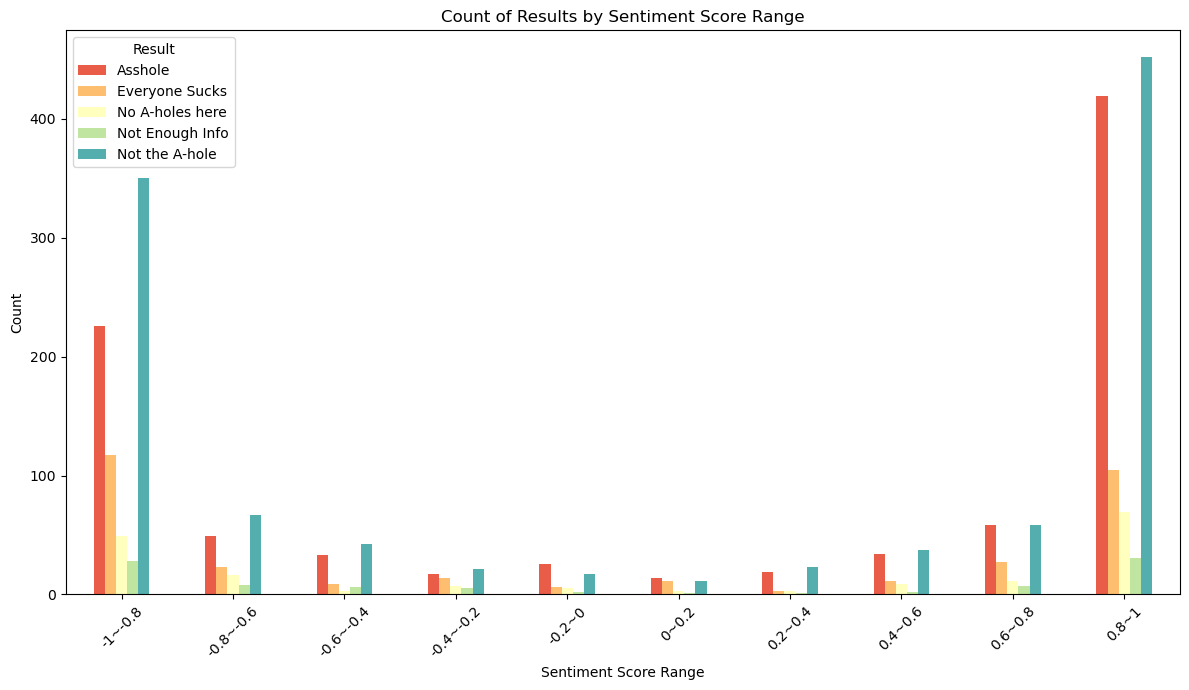

In [12]:
df2 = df.groupby(['sentiment_score_range', 'result'])['result'].count()

# Unstack data for plotting
unstacked_df2 = df2.unstack()

# Set a color palette
colors = sns.color_palette('Spectral', n_colors=len(unstacked_df2.columns))
# Plot the data with the specified color palette
unstacked_df2.plot(kind='bar', figsize=(12, 7), color=colors)
plt.title('Count of Results by Sentiment Score Range')
plt.ylabel('Count')
plt.xlabel('Sentiment Score Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Result')
plt.show()

## Modeling

In [13]:
import gensim
from gensim import corpora

# Use the 'content' column for topic modeling
all_content = aita_data['content'].tolist()

# Tokenizing the content
tokenized_content = [content.split() for content in all_content]

# Creating a dictionary and corpus required for Topic Modeling
dictionary = corpora.Dictionary(tokenized_content)
corpus = [dictionary.doc2bow(content) for content in tokenized_content]

# Building the LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# Printing the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.032*"I" + 0.031*"to" + 0.030*"and" + 0.027*"the" + 0.018*"she" + 0.018*"her" + 0.017*"a" + 0.014*"my" + 0.011*"that" + 0.011*"of"
Topic: 1 
Words: 0.034*"to" + 0.034*"I" + 0.031*"and" + 0.024*"the" + 0.023*"a" + 0.017*"her" + 0.015*"my" + 0.014*"that" + 0.014*"of" + 0.014*"she"
Topic: 2 
Words: 0.042*"I" + 0.032*"and" + 0.030*"to" + 0.028*"the" + 0.022*"my" + 0.019*"a" + 0.013*"that" + 0.012*"was" + 0.012*"of" + 0.011*"for"
Topic: 3 
Words: 0.036*"and" + 0.034*"I" + 0.026*"to" + 0.025*"the" + 0.019*"my" + 0.016*"a" + 0.014*"was" + 0.011*"that" + 0.011*"of" + 0.010*"he"
Topic: 4 
Words: 0.045*"I" + 0.041*"and" + 0.027*"to" + 0.026*"the" + 0.020*"a" + 0.017*"my" + 0.013*"was" + 0.012*"that" + 0.012*"for" + 0.011*"her"


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Convert the 'result' column to binary
aita_data['is_asshole'] = aita_data['result'].apply(lambda x: 1 if x == "Asshole" else 0)

X_train, X_test, y_train, y_test = train_test_split(aita_data['content'], aita_data['is_asshole'], test_size=0.25)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.85      0.75       413
           1       0.48      0.24      0.32       229

    accuracy                           0.64       642
   macro avg       0.57      0.55      0.54       642
weighted avg       0.60      0.64      0.60       642



In [15]:
# Remove rows with 'not enough info'
aita_data = aita_data[aita_data['result'] != 'Not Enough Info']

# Map results to binary classification
result_mapping = {
    'Everyone Sucks': 'Asshole',
    'No A-holes here': 'NTA',
    'Asshole': 'Asshole',
    'Not The A-hole': 'NTA'
}

aita_data['binary_result'] = aita_data['result'].map(result_mapping)


In [16]:
# Initialize counters
correct_predictions = 0
total_predictions = 0

# Adjust the aita_data dataframe according to the advice
aita_data = aita_data[aita_data['result'] != 'Not Enough Info']  # Exclude entries labeled "Not Enough Info"
aita_data['result'].replace({'Everyone Sucks': 'Asshole', 'No A-holes here': 'Not The A-hole'}, inplace=True)

# Re-train the model on the adjusted data here...

for index, row in aita_data.iterrows():
    # Get the content and actual result
    content = row['content']
    actual_result = row['result']

    # Predict using the model
    prediction = model.predict([content])[0]
    
    # Convert prediction to the format in 'result' column
    predicted_result = "Asshole" if prediction == 1 else "Not The A-hole"  # Adjust this mapping if there are more labels

    # Check if prediction matches actual result
    if predicted_result == actual_result:
        correct_predictions += 1

    total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 31.97%


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
#aita_data = pd.read_csv('path_to_your_data.csv')  # Replace with the path to your data

# Preprocessing
aita_data['combined_text'] = aita_data['title'] + " " + aita_data['content']

# Convert result to binary: Asshole = 1, Not The A-hole = 0
aita_data['is_asshole'] = aita_data['result'].apply(lambda x: 1 if x == "Asshole" else 0)

# Feature Engineering
X = aita_data['combined_text']
y = aita_data['is_asshole']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.85, min_df=0.01)),
    ('clf', RandomForestClassifier())
])

# Grid search parameters
parameters = {
    'tfidf__max_features': (5000, 10000),
    'clf__n_estimators': (100, 200),
    'clf__max_depth': (None, 10, 20)
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Print accuracy score
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# Function to analyze a text
def analyze_text(text):
    prediction = grid_search.predict([text])[0]
    prob = grid_search.predict_proba([text])
    asshole_prob = prob[0][1]
    
    if prediction == 1:
        return f"Yes, I am an asshole. Percentage: {asshole_prob*100:.2f}%"
    else:
        return f"No, I am not an asshole. Percentage: {(1-asshole_prob)*100:.2f}%"

# Example usage:



Model Accuracy: 50.30%


In [19]:
text_input = input("Enter your text: ")
if text_input.strip():  # Check if not empty
    print(analyze_text(text_input))
else:
    print("Invalid input.")

No, I am not an asshole. Percentage: 50.37%


## Modeling with BERT (Binary Prediction)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from tqdm import tqdm


# 1. Load and Preprocess the Data
data = pd.read_csv("reddit_final_v2.csv")
train_texts, val_texts, train_labels, val_labels = train_test_split(data['content'].tolist(), data['result'].tolist(), test_size=0.2, random_state=42)
train_labels = [0 if label == 'Asshole' else 1 for label in train_labels]
val_labels = [0 if label == 'Asshole' else 1 for label in val_labels]

# 2. Tokenization using bert-large
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)  # increased max_length
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)

# 3. Convert Encodings to PyTorch Dataset
class RedditDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = RedditDataset(train_encodings, train_labels)
val_dataset = RedditDataset(val_encodings, val_labels)

# 4. Fine-tuning BERT Large Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    logging_steps=10,  # log every 10 steps for frequent progress update
    save_steps=500,
    evaluation_strategy='steps',
    save_total_limit=2,
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda p: {'accuracy': (p.predictions.argmax(-1) == p.label_ids).astype(float).mean()},
    tokenizer=tokenizer,
)

print("Training model...")
trainer.train()

# 5. Evaluate Model
print("Evaluating model...")
results = trainer.evaluate()
accuracy = results['eval_accuracy']
print(f"Test Accuracy: {accuracy:.2f}")



#### Test Accuracy: 0.65